## PA3.5(b) - Transfer Learning

### Use TL to replace encoder layer of FCN

In [1]:
## Data generation

In [2]:
from tl_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [3]:
# Precomputed Class Weights
class_weights = torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])

In [4]:
#hyper param
epochs = 30   
lr = 0.0004
criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_5b"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

creating model...
GPU: True
Training...
in val


/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Loss at epoch: 0 is 3.1678451810564314
IoU at epoch: 0 is 0.0049148233588404795
Pixel acc at epoch: 0 is 0.04075820930302143
in train
epoch0, iter0, loss: 2.79880690574646
epoch0, iter10, loss: 2.142003059387207
epoch0, iter20, loss: 1.7963186502456665
epoch0, iter30, loss: 2.0151493549346924
epoch0, iter40, loss: 1.7407588958740234
epoch0, iter50, loss: 1.7177724838256836
Finish epoch 0, time elapsed 66.82979249954224
in val
Loss at epoch: 0 is 1.610073276928493
IoU at epoch: 0 is 0.18176608525885082
Pixel acc at epoch: 0 is 0.6900826607431684
epoch1, iter0, loss: 1.646064043045044
epoch1, iter10, loss: 1.764237403869629
epoch1, iter20, loss: 1.3346271514892578
epoch1, iter30, loss: 1.6140817403793335
epoch1, iter40, loss: 1.1624839305877686
epoch1, iter50, loss: 1.071730375289917
Finish epoch 1, time elapsed 69.46047186851501
in val
Loss at epoch: 1 is 1.3596637419291906
IoU at epoch: 1 is 0.18715461248244997
Pixel acc at epoch: 1 is 0.7435495342527118
epoch2, iter0, loss: 1.41959786

epoch19, iter0, loss: 0.31109917163848877
epoch19, iter10, loss: 0.6089994311332703
epoch19, iter20, loss: 0.5495977997779846
epoch19, iter30, loss: 0.46230295300483704
epoch19, iter40, loss: 0.6050052046775818
epoch19, iter50, loss: 0.39095574617385864
Finish epoch 19, time elapsed 68.2889039516449
in val
Loss at epoch: 19 is 0.4110741594008037
IoU at epoch: 19 is 0.40238897113816907
Pixel acc at epoch: 19 is 0.8829307981899807
epoch20, iter0, loss: 0.35252198576927185
epoch20, iter10, loss: 0.5323294997215271
epoch20, iter20, loss: 0.38196736574172974
epoch20, iter30, loss: 0.5925616025924683
epoch20, iter40, loss: 0.6023762226104736
epoch20, iter50, loss: 0.4344388246536255
Finish epoch 20, time elapsed 63.27101540565491
in val
Loss at epoch: 20 is 0.3459184340068272
IoU at epoch: 20 is 0.44612226794788484
Pixel acc at epoch: 20 is 0.9007625239236015
epoch21, iter0, loss: 0.3022301495075226
epoch21, iter10, loss: 0.2185804843902588
epoch21, iter20, loss: 0.44595563411712646
epoch21,

In [5]:
latest_fcn_model = torch.load(model_name)
latest_fcn_model.to(device)
test(latest_fcn_model)

in test
Loss :is 0.3791177826268332
IoU is 0.4836457889301825
Pixel is 0.8747589758464268


0

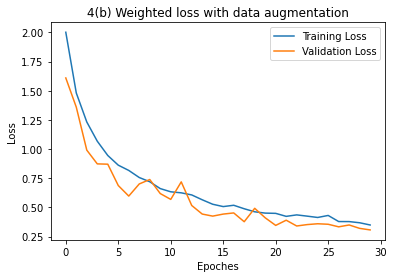

In [8]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("4(b) Weighted loss with data augmentation")
plt.savefig("plots/Q5_b")
plt.show()